In [ ]:
# <font color='green'>Project 1 
## Group 26 
### Members: 
Durgalakshmi Sundaraman(dxs190016)                                                                                         


## <font color='green'> Regression

### This project predicts life expectancy of a person in various country based on the living and health standards. Thus the models used in this are mainly:


#### 1) KNN classification
#### 2) Linear Regression
#### 3) Decision Tree
#### 4) Linear SVM
#### 5) Kernel SVM (RBF, Linear, Poly)

### Importing necessary libraries for the project

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
np.random.seed(42)

### Importing the Dataset for classification


In [2]:
#reading the dataset
df_life = pd.read_excel("C:\\Users\\sundh\Desktop\\Project1_Regression_Data.xlsx")
df_life.shape

(1535, 22)

This dataset is  taken from kaggle. It contains information of the living and health standards of people in various countries</b> in this is <b>life expectancy</b> variable . The model works to predict the life expectancy in years of an individual<br>
The dataset has <b>1535</b> observations with <b>22</b> columns <br>


<b>Column                         : Description</b><br>
<b>Country </b>                    : Country the respondent is in<br>
<b>Year  </b>                     : Year of the response <br>
<b>Status</b>              : Status of the country<br>
<b>Life expectancy </b>      : Average life expectancy as age<br>
<b>Adult Mortality </b>      : Average Adult mortality rate<br>
<b>infant deaths  </b>       : Average infant deaths <br>
<b>Alcohol </b>         : Alcohol consumption<br>
<b>percentage expenditure              </b>     : Average medicalExpenditure <br>
<b>Hepatitis B         </b>               :  Hepatitis B immunisation among infants<br>
<b>Measles         </b>                 : No. measles cases reported<br>
<b>BMI            </b>                : BMI of population<br>
<b>under-five deaths   </b>               :Number of under five deaths<br>
<b>Polio </b>           : Polio coverage among<br>
<b>Diphtheria   </b>             : Diphtheria immunisation<br>
<b>HIV/AIDS    </b>                : HIV deaths per 1000<br>
<b>GDP  </b>          : GDP of the country<br>
<b>Population                   </b>Population of the country<br>
<b>thinness  1-19 years   </b>  :  prevelance of thinness in 1-19 year age group<br>
<b>thinness 5-9 years     </b>        : prevelance of thinness in 5-9 year age group<br>
<b>Income composition of resources  </b>  : Income composition of population<br>
<b>Schooling  </b>        : Number of years of schooling<br>




## Exploratory Data Analysis

The exploratory data analysis is performed on the dataset to understand the variations, range, detect outliers and collinearity if it exists in the dataset.

### <b>Check for null</b>

 Upon checking for null we find that 1385 of the data cells in the dataset have a randomly disbursed null presence

In [3]:
#check the datatypes
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1534 non-null   object 
 1   Year                             1534 non-null   float64
 2   Status                           1533 non-null   object 
 3   Life expectancy                  1527 non-null   float64
 4   Adult Mortality                  1524 non-null   float64
 5   infant deaths                    1534 non-null   float64
 6   Alcohol                          1433 non-null   float64
 7   percentage expenditure           1533 non-null   float64
 8   Hepatitis B                      1229 non-null   float64
 9   Measles                          1535 non-null   int64  
 10  BMI                              1514 non-null   float64
 11  under-five deaths                1535 non-null   int64  
 12  Polio               

In [4]:
#sum of the total nulls in dataset
df_life.isna().sum().sum()

1385

In [5]:
#stripping blanks from column headers
df_life.columns = df_life.columns[:].str.strip() #strip removes both start and end
df_life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### Dropping unwanted columns

The column country is dropped here as it doesnt add to our data prediction

In [6]:
#droping column country
df_life.drop(['Country'],inplace=True,axis=1)

### Handling Null

To handle the null we check the data in the first five rows

In [7]:
#reading the first five rows in the dataset
df_life.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2011.0,Developed,73.7,144.0,1.0,10.67,875.149519,96.0,157,63.3,...,95.0,6.88,95.0,0.1,7813.834990,7348328.0,2.0,2.0,0.775,14.2
1,2008.0,Developing,61.4,217.0,8.0,0.02,61.762638,74.0,4,26.1,...,73.0,3.23,74.0,1.3,1167.535689,347541.0,9.2,8.9,0.475,7.2
2,2007.0,Developing,73.4,165.0,9.0,8.70,0.000000,62.0,32,57.6,...,67.0,5.25,62.0,0.1,NaN,NaN,1.6,1.5,0.728,12.9
3,2013.0,Developing,74.3,89.0,8.0,0.09,2047.113102,98.0,1164,66.4,...,NaN,4.25,98.0,0.1,24934.386140,NaN,7.6,7.5,0.830,15.2
4,2011.0,Developed,74.3,139.0,2.0,9.10,10.325889,96.0,4189,57.7,...,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7


In [8]:
#sum of null by column
df_life.isna().sum()

Year                                 1
Status                               2
Life expectancy                      8
Adult Mortality                     11
infant deaths                        1
Alcohol                            102
percentage expenditure               2
Hepatitis B                        306
Measles                              0
BMI                                 21
under-five deaths                    0
Polio                               14
Total expenditure                  120
Diphtheria                          12
HIV/AIDS                             2
GDP                                231
Population                         338
thinness  1-19 years                20
thinness 5-9 years                  20
Income composition of resources     87
Schooling                           86
dtype: int64

<b>Handle Null</b>
To handle the null, we choose to impute the mean value of the numeric columns and for categorical variables we have imputed the value with most count

In [9]:
# Replacing null values with mean of the column values
df_life['Life expectancy'].fillna(df_life['Life expectancy'].mean(), inplace=True)
df_life['Adult Mortality'].fillna(df_life['Adult Mortality'].mean(), inplace=True)
df_life['Alcohol'].fillna(df_life['Alcohol'].mean(), inplace=True)
df_life['Hepatitis B'].fillna(df_life['Hepatitis B'].mean(), inplace=True)
df_life['BMI'].fillna(df_life['BMI'].mean(), inplace=True)
df_life['Polio'].fillna(df_life['Polio'].mean(), inplace=True)
df_life['Total expenditure'].fillna(df_life['Total expenditure'].mean(), inplace=True)
df_life['Diphtheria'].fillna(df_life['Diphtheria'].mean(), inplace=True)
df_life['GDP'].fillna(df_life['GDP'].mean(), inplace=True)
df_life['Population'].fillna(df_life['Population'].mean(), inplace=True)
df_life['infant deaths'].fillna(df_life['infant deaths'].mean(), inplace=True)
df_life['percentage expenditure'].fillna(df_life['percentage expenditure'].mean(), inplace=True)
df_life['HIV/AIDS'].fillna(df_life['BMI'].mean(), inplace=True)

df_life['thinness  1-19 years'].fillna(df_life['thinness  1-19 years'].mean(), inplace=True)
df_life['thinness 5-9 years'].fillna(df_life['thinness 5-9 years'].mean(), inplace=True)
df_life['Income composition of resources'].fillna(df_life['Income composition of resources'].mean(), inplace=True)
df_life['Schooling'].fillna(df_life['Schooling'].mean(), inplace=True)
df_life['Year'].fillna(df_life['Year'].value_counts().index[0], inplace=True)
df_life['Status'].fillna(df_life['Status'].value_counts().index[0], inplace=True)

In [10]:
#checking for nulls in each column
df_life.isna().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Data Visualisation

We check the spread of the target variable Life expectancy.

The developed countries more life expectancy than developing countries

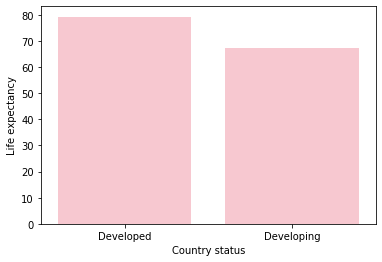

In [11]:
#life expectancy in Developed and Developing countries
#plt.figure(figsize=(16, 6))
plot2=sns.barplot(data=df_life,x='Status',y='Life expectancy',color='Pink',ci=None)
plot2.set(xlabel="Country status", ylabel="Life expectancy")
plt.show()

Over years the life expectancy has been gradually growing 

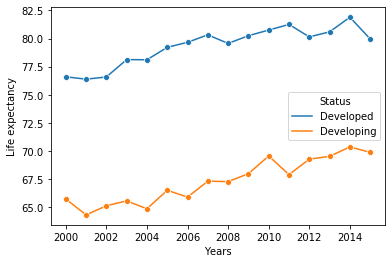

In [12]:
#life expectancy over the years
#plt.figure(figsize=(16, 6))
plot2=sns.lineplot(data=df_life,x='Year',y='Life expectancy',hue='Status',marker='o',ci=None)
plot2.set(xlabel="Years", ylabel="Life expectancy")
plt.show()

Mortality rates of the developed countries are lesser  while in developing countries its dispersed
The expenditure on fealth is more for developed countries

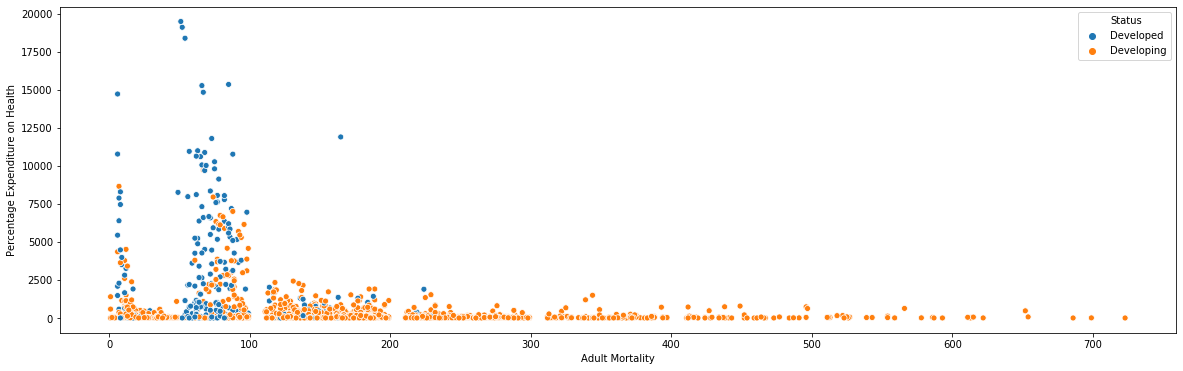

In [13]:
#PLotting the scatterplot to depict relationship between Adult Mortality and Percentage Expenditure on Health
plt.figure(figsize=(20, 6))
plot2=sns.scatterplot(data=df_life,x='Adult Mortality',y='percentage expenditure',hue='Status',color='Pink')#,order=[0,1]
plot2.set(xlabel="Adult Mortality", ylabel="Percentage Expenditure on Health")
plt.show()

Immunisations for various diseases in both status of countries.  We can see that the developed countries are more immunised

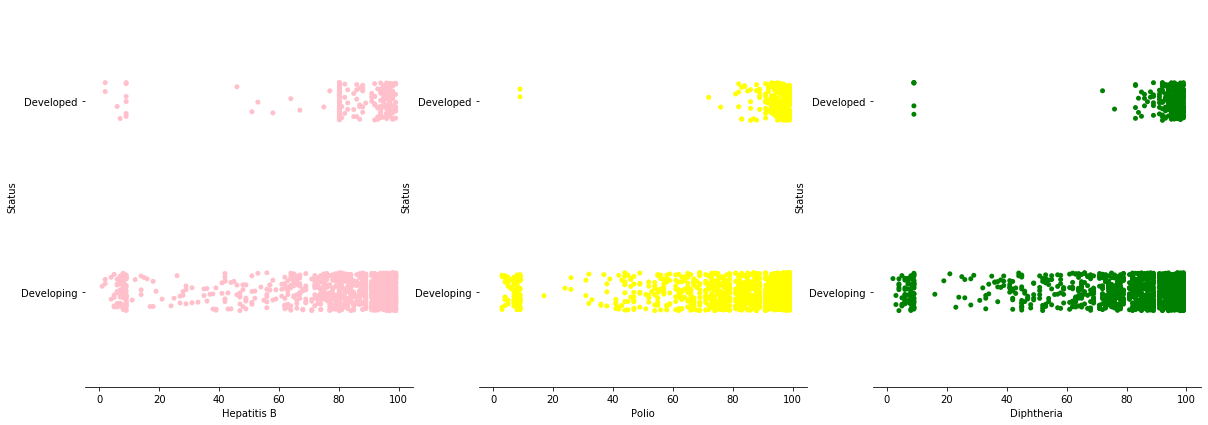

In [14]:
#Plotting the number of different immunizations given in developing and developed countries
fig, ax =plt.subplots(1,3,figsize=(20, 7),sharex=True)
sns.despine(left=True)
sns.stripplot(data=df_life,x='Hepatitis B',y='Status', ax=ax[0],color='Pink')
sns.stripplot(data=df_life,x='Polio',y='Status', ax=ax[1],color='Yellow')
sns.stripplot(data=df_life,x='Diphtheria',y='Status',ax=ax[2],color='Green')
plt.show()

Mortality rates are spread across  all BMI counts for developing countries

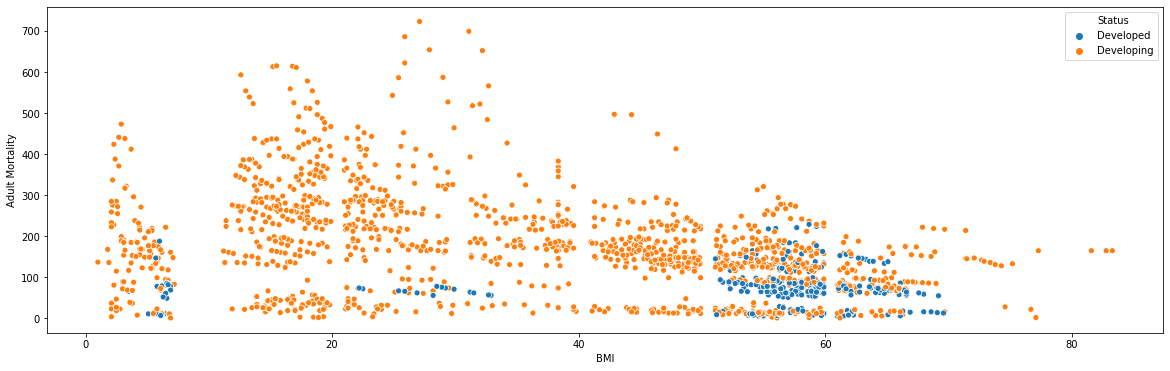

In [15]:
#PLotting the scatterplot of BMI and Adult Mortality
plt.figure(figsize=(20, 6))
plot2=sns.scatterplot(data=df_life,x='BMI',y='Adult Mortality',hue='Status',color='Pink')#,order=[0,1]
plot2.set(xlabel="BMI", ylabel="Adult Mortality")
plt.show()

Distribution of various variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252E7864108>,
      dtype=object)

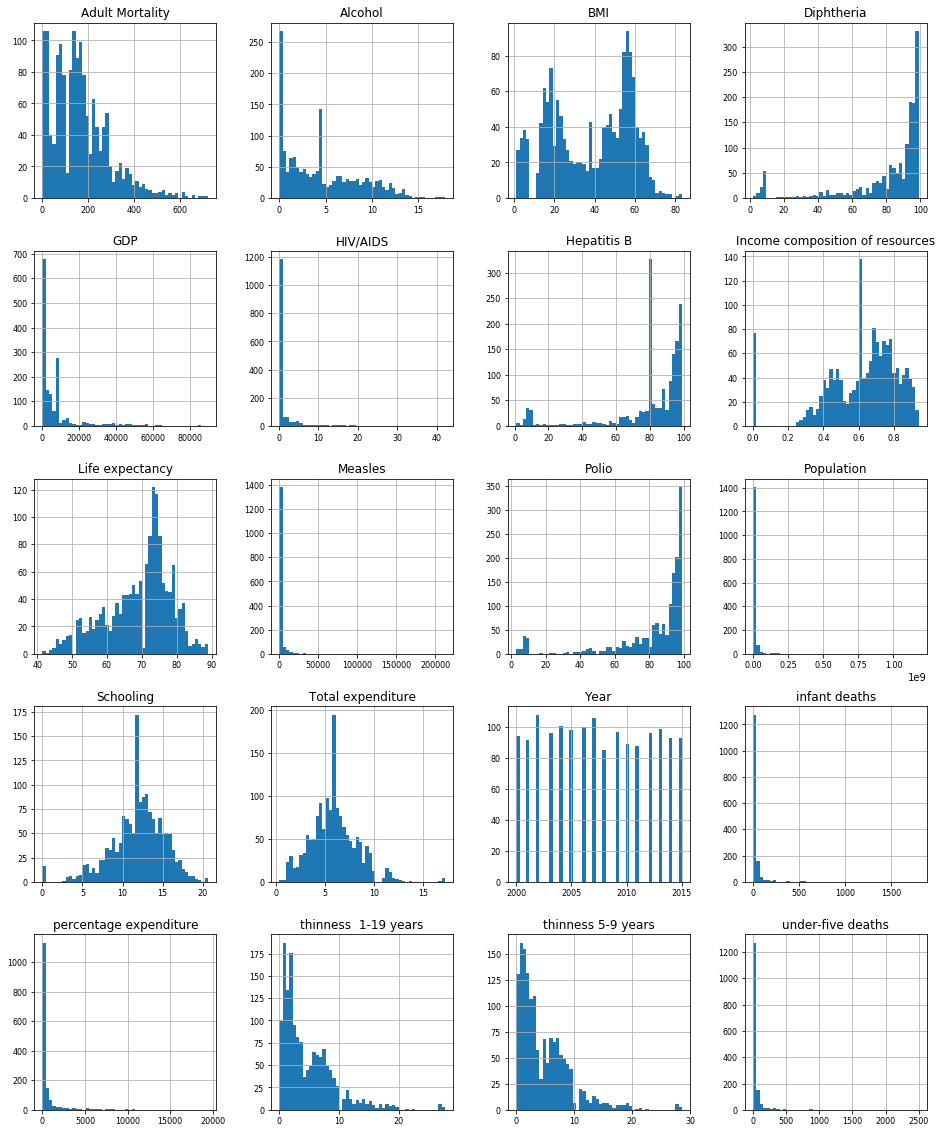

In [16]:
#Further exploration using histogram to check the distributions - EDA
df_life.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Handle categorical variables

The categorical variables need to be converted to dummy variables which add more columns. Categorical variables will be represented as 0 or 1 in the columns 

In [17]:
# creating dummy variables for the Status variable
cols = pd.get_dummies(df_life['Status'], prefix= 'Status')
df_life[cols.columns] = cols
df_life.drop('Status', axis = 1, inplace = True)


In [18]:
# creating dummy variables for the Year variable
cols = pd.get_dummies(df_life['Year'], prefix= 'Year')
df_life[cols.columns] = cols
df_life.drop('Year', axis = 1, inplace = True)


In [19]:
#the shape of the df now changes because of addition of dummy variables
df_life.shape

(1535, 37)

In [20]:
#Checking the final list of columns
for col in df_life.columns: 
    print(col) 

Life expectancy
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles
BMI
under-five deaths
Polio
Total expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness  1-19 years
thinness 5-9 years
Income composition of resources
Schooling
Status_Developed
Status_Developing
Year_2000.0
Year_2001.0
Year_2002.0
Year_2003.0
Year_2004.0
Year_2005.0
Year_2006.0
Year_2007.0
Year_2008.0
Year_2009.0
Year_2010.0
Year_2011.0
Year_2012.0
Year_2013.0
Year_2014.0
Year_2015.0


### Train and Test Split

The test and train split is done with default of 0.25

In [21]:
#assigning life expectancy as target column
X = df_life.drop('Life expectancy',axis=1).values
y=df_life['Life expectancy'].values

In [22]:
#just checking the predictor variables
X

array([[1.440e+02, 1.000e+00, 1.067e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.170e+02, 8.000e+00, 2.000e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.650e+02, 9.000e+00, 8.700e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [7.300e+01, 0.000e+00, 7.530e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 1.000e+00, 5.800e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.400e+01, 1.000e+00, 4.170e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [23]:
#checking the target variable
y

array([73.7, 61.4, 73.4, ..., 88. , 66.3, 78. ])

In [24]:
#creating the formal X and y split
X_train_org,X_test_org,y_train,y_test= train_test_split(X,y, random_state=0)

In [25]:
df_life.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
Year_2000.0                        0
Year_2001.0                        0
Year_2002.0                        0
Year_2003.0                        0
Year_2004.0                        0
Year_2005.0                        0
Y

### Scaling
Scaling is done with MinMax scaler which scales the data with respect to the minimum and maximum values, this is better than the standard scaler which will mostly incline towards the mean of the data.

In [26]:
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)


#Scores
train_score=[]
test_score=[]

### REGRESSION MODELS

### K Nearest Neighbors

The KNN model is run on the dataframe with checking for neighbours upto 10 to find a suitable neighbour to run.
N=1 provides a overfitting model in training but will not do well in test. While a large nighbour will smoothen the classification boundary

In [27]:
#running K Neighbors Regressor for variety of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
param_grid5 = {'n_neighbors': [1,2,3,4,5,6,7] }
kn=GridSearchCV(KNeighborsRegressor(),param_grid5, cv=3,return_train_score=True)
kn.fit(X_train,y_train)
train=kn.cv_results_['mean_train_score']
print("Training score: {}".format(train.mean()))
print("Best cross-validation score: {}".format(kn.best_score_))
print("Best parameters: {}".format(kn.best_params_))



Training score: 0.8479717810493225
Best cross-validation score: 0.6959601407471275
Best parameters: {'n_neighbors': 4}


Upon checking best fit for KNN neighbours we use 4 as the best neighbour number

In [28]:
#General Model and we are fitting the 4 neigbors as best from the above run
knn=KNeighborsRegressor(n_neighbors=4)
knn_model=knn.fit(X_train,y_train)

print("train_score for KNeigbors Regressor:",knn_model.score(X_train,y_train))
print("test_score for KNeigbors Regressor:", knn_model.score(X_test,y_test))

train_score for KNeigbors Regressor: 0.8406676296678313
test_score for KNeigbors Regressor: 0.7362000512387651


In [29]:
#calculating the accuracies
from sklearn.model_selection import cross_val_score

knn_accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_accuracies.mean()*100))

Accuracy: 71.71 %


### Linear Regression

Linear regression is used to predict a linear equation which can be used to predict with the error margin less

In [30]:
#Since this model has no scaling parameter, we directly apply grid search

lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)


print("train_score for Linear Regression:",l_model.score(X_train, y_train))
print("test_score: for Linear Regression", l_model.score(X_test, y_test))

train_score for Linear Regression: 0.8141305971695001
test_score: for Linear Regression 0.8049653723725213


In [31]:
#calculating the accuracies
lg_accuracies = cross_val_score(estimator = l_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lg_accuracies.mean()*100))

Accuracy: 79.63 %


### Ridge Regression
Alpha is introduced to penalise the coefficients 

In [32]:
#running Ridge Regression on the dataset
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)
print('validation score: ', grid_model_ridge.best_score_)

{'alpha': 0.01}
validation score:  0.7971327090229876


In [33]:
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=0.01)
ridge_model=ridge_1.fit(X_train,y_train)

print("train_score for ridge regression:",ridge_model.score(X_train,y_train))
print("test_score for ridge regression:",ridge_model.score(X_test,y_test))

train_score for ridge regression: 0.8130718162553723
test_score for ridge regression: 0.8051285517009011


In [34]:
#calculating the accuracies
rg_accuracies = cross_val_score(estimator = ridge_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg_accuracies.mean()*100))

Accuracy: 79.52 %


### Lasso Regression
The lasso regression run with different alpha parameters to check the best

In [35]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)
print('validation score: ', grid_model_lasso.best_score_)

{'alpha': 0.01}
validation score:  0.7869084091191033


In [36]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01, tol=0.01)
lasso_model=lasso_1.fit(X_train,y_train)
train_score.append(lasso_model.score(X_train,y_train))
test_score.append(lasso_model.score(X_test,y_test))

test=round(lasso_model.score(X_test,y_test),2)

print("train_score for Lasso Regression:",lasso_model.score(X_train,y_train))
print("test_score for Lasso Regression:",lasso_model.score(X_test,y_test))

train_score for Lasso Regression: 0.8048581932948329
test_score for Lasso Regression: 0.8060485256129097


In [37]:
#calculating the accuracies
lasg_accuracies = cross_val_score(estimator = lasso_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg_accuracies.mean()*100))

Accuracy: 78.88 %


### Polynomial Regression

The polynomial regression is used to provide a curve to fit the data point instead of line

In [38]:
#running Polynomial Regression on the dataset

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    StandardScaler(),
  PolynomialFeatures(),
    Ridge())
param_grid = {'polynomialfeatures__degree': [2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [39]:
#using gridsearch
poly = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1,return_train_score=True)
poly.fit(X_train, y_train)
train=poly.cv_results_['mean_train_score']
print("Best cross-validation score: {}".format(poly.best_score_))
print("Best parameters: {}".format(poly.best_params_))

poly_train = print(round(train.mean(),2))
poly_test = print(round(test.mean(),2))

Best cross-validation score: 0.8126260561143539
Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 100}
0.98
0.81


Running with polynomial features of degree 2 this allows for x0, x1 , x2

In [40]:
#calculating the accuracy
log=LinearRegression()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
log_model=log.fit(X_train_poly, y_train)
pg_accuracies = cross_val_score(estimator = log_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(pg_accuracies.mean()*100))

Accuracy: 79.63 %


### Linear SVM

In [41]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [42]:
linearsvr = LinearSVR(max_iter=10000000)
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)

In [43]:
grid_svrl.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=10000000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [44]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 1}
Best cross-validation score: 0.7927


In [45]:
lsvr = LinearSVR(C = 100, epsilon = 1,max_iter=10000000)
        
lsvr.fit(X_train, y_train)

print(lsvr.score(X_train, y_train))
print(lsvr.score(X_test, y_test))

0.805215051097228
0.8073131635959772


In [46]:
#kfold valiation is done with split 10
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , X_train, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.8165389  0.76845916 0.76050453 0.78944496 0.76002587 0.83386802
 0.79932163 0.80845022 0.84508553 0.74503732]
0.7927049975739628


In [47]:
#calculating the accuracy
linsvm_accuracies = cross_val_score(estimator = lsvr, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(linsvm_accuracies.mean()*100))

Accuracy: 79.13 %


In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , X_train, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.81643091 0.76867957 0.76016899 0.7892932  0.75998655 0.83386353
 0.79947078 0.80848704 0.84505269 0.7451443 ]
0.7926810688069825


In [49]:
#result for each grid printed
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002593,0.000489,0.001098,0.000300,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",-4.301743,-3.981407,-3.411643,...,-3.735390,-3.830203,-3.727266,-3.794222,-3.737749,-3.827021,-3.762942,-3.715520,-3.775476,0.043381
1,0.001924,0.001138,0.000499,0.000499,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",-4.283300,-3.968050,-3.411643,...,-3.735390,-3.830203,-3.712613,-3.794222,-3.734093,-3.827021,-3.762942,-3.699517,-3.769165,0.045468
2,0.001562,0.004686,0.000000,0.000000,0.01,1,"{'C': 0.01, 'epsilon': 1}",-4.247950,-3.939127,-3.411202,...,-3.734237,-3.863618,-3.690750,-3.793907,-3.699461,-3.826680,-3.751202,-3.704448,-3.760138,0.054331
3,0.003125,0.006251,0.001563,0.004688,0.01,10,"{'C': 0.01, 'epsilon': 10}",-5.132970,-4.708905,-4.152053,...,-4.555747,-4.617328,-4.474899,-4.587319,-4.524664,-4.638368,-4.556243,-4.494120,-4.548652,0.051980
4,0.000000,0.000000,0.001562,0.004685,0.01,100,"{'C': 0.01, 'epsilon': 100}",-61.949839,-54.397029,-48.841274,...,-53.860610,-54.896779,-51.805479,-54.190603,-52.399540,-54.792132,-53.288060,-52.317455,-53.328274,1.025613
5,0.003124,0.006248,0.001562,0.004687,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",0.511079,0.496064,0.372888,...,0.526541,0.505876,0.517218,0.497464,0.512837,0.506613,0.501164,0.518314,0.510430,0.008191
6,0.003123,0.006247,0.001562,0.004685,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",0.511310,0.494511,0.372024,...,0.525306,0.506706,0.517236,0.497663,0.511869,0.507970,0.501616,0.519554,0.510424,0.007907
7,0.000000,0.000000,0.000000,0.000000,0.1,1,"{'C': 0.1, 'epsilon': 1}",0.518059,0.500397,0.372855,...,0.525574,0.505596,0.517509,0.500164,0.513204,0.506149,0.504633,0.518898,0.511164,0.007312
8,0.000000,0.000000,0.001562,0.004687,0.1,10,"{'C': 0.1, 'epsilon': 10}",0.290183,0.216059,0.135546,...,0.255475,0.220336,0.264664,0.235325,0.238457,0.226807,0.240459,0.246813,0.242804,0.012648
9,0.000000,0.000000,0.003125,0.006249,0.1,100,"{'C': 0.1, 'epsilon': 100}",-61.949839,-54.397029,-48.841274,...,-53.860610,-54.896779,-51.805479,-54.190603,-52.399540,-54.792132,-53.288060,-52.317455,-53.328274,1.025613


### SVR with Kernal Linear
Various c parameters are tried to find the best

In [50]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [51]:
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [52]:
grid_svr_linear.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [53]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.7886


C=100 is run with linear kernel trick

In [54]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train, y_train)
        
        #evaluate the model
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.8055968786945975
0.8052564055276314


In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.77063336 0.78477796 0.76801928 0.81898445 0.80407389 0.78517341]
0.7886103911297093


In [56]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.085282,0.009012,0.012022,0.002569,0.01,{'C': 0.01},0.188792,0.177014,0.180120,0.182447,...,0.011878,5,0.193110,0.192519,0.188692,0.177610,0.171812,0.171641,0.182564,0.009195
1,0.080663,0.018989,0.011642,0.008449,0.1,{'C': 0.1},0.653200,0.642872,0.632760,0.692796,...,0.021244,4,0.668620,0.674179,0.674229,0.665925,0.659070,0.667242,0.668211,0.005192
2,0.110019,0.023009,0.015622,0.009019,1,{'C': 1},0.792236,0.764297,0.759432,0.797988,...,0.015868,3,0.790521,0.793293,0.796655,0.784603,0.786210,0.790422,0.790284,0.004053
3,0.153610,0.020990,0.013018,0.005822,10,{'C': 10},0.777472,0.780181,0.766102,0.814197,...,0.016725,2,0.805159,0.801743,0.810140,0.796023,0.796865,0.802216,0.802024,0.004803
4,0.558448,0.126555,0.010969,0.005689,100,{'C': 100},0.770633,0.784778,0.768019,0.818984,...,0.017960,1,0.808135,0.805400,0.811455,0.797703,0.798020,0.805502,0.804369,0.005025


Text(0.5, 0, 'C')

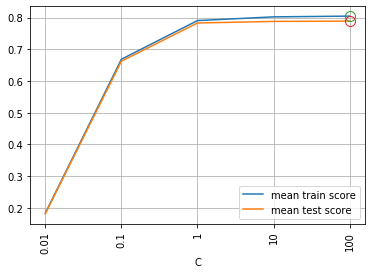

In [57]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

In [58]:
#calculating the accuracy
ksvml_accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(ksvml_accuracies.mean()*100))

Accuracy: 78.56 %


### SVR with Kernal 'Poly'

In [59]:
#grid parameters are written
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [60]:
#kernel poly function is craeted
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [61]:
#the poly kernel with params is fit
grid_svr_poly.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [62]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.8149


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.055189,0.003415,0.009891,4.133651e-03,1,1,"{'C': 1, 'degree': 1}",0.713477,0.727243,0.739547,0.726756,0.010649,6,0.737613,0.739215,0.725262,0.734030,0.006234
1,0.054231,0.001244,0.031244,2.209192e-02,1,3,"{'C': 1, 'degree': 3}",0.738328,0.760574,0.766010,0.754971,0.011976,5,0.781862,0.781485,0.777130,0.780159,0.002148
2,0.087781,0.021316,0.015621,1.857014e-06,10,1,"{'C': 10, 'degree': 1}",0.782647,0.782088,0.791873,0.785536,0.004487,4,0.801161,0.797594,0.790903,0.796552,0.004252
3,0.109349,0.000001,0.020828,7.363841e-03,10,3,"{'C': 10, 'degree': 3}",0.805368,0.805718,0.802802,0.804630,0.001300,2,0.871103,0.868348,0.865924,0.868458,0.002116
4,0.151014,0.019488,0.020821,7.361033e-03,100,1,"{'C': 100, 'degree': 1}",0.781732,0.789267,0.792321,0.787773,0.004450,3,0.808159,0.804648,0.794842,0.802550,0.005636
5,0.359291,0.022092,0.015621,3.371748e-07,100,3,"{'C': 100, 'degree': 3}",0.807252,0.817907,0.819477,0.814879,0.005431,1,0.947302,0.943471,0.936893,0.942555,0.004298


C=100 and degree =3 is run with poly kernel

In [63]:
# svm poly is run with c=100, degree=3
svr_p = SVR(kernel='poly',C=100,degree = 3)
svr_p.fit(X_train, y_train)
svr_p.score(X_train, y_train)
svr_p.score(X_test, y_test)

0.8130048785997941

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, X_train, y_train, cv=kfold)))
scores = cross_val_score(svr_p, X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.77701791 0.8448449  0.85448195 0.85032265 0.87026105 0.8304498 ]
0.8378963776022396


In [65]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.055189,0.003415,0.009891,4.133651e-03,1,1,"{'C': 1, 'degree': 1}",0.713477,0.727243,0.739547,0.726756,0.010649,6,0.737613,0.739215,0.725262,0.734030,0.006234
1,0.054231,0.001244,0.031244,2.209192e-02,1,3,"{'C': 1, 'degree': 3}",0.738328,0.760574,0.766010,0.754971,0.011976,5,0.781862,0.781485,0.777130,0.780159,0.002148
2,0.087781,0.021316,0.015621,1.857014e-06,10,1,"{'C': 10, 'degree': 1}",0.782647,0.782088,0.791873,0.785536,0.004487,4,0.801161,0.797594,0.790903,0.796552,0.004252
3,0.109349,0.000001,0.020828,7.363841e-03,10,3,"{'C': 10, 'degree': 3}",0.805368,0.805718,0.802802,0.804630,0.001300,2,0.871103,0.868348,0.865924,0.868458,0.002116
4,0.151014,0.019488,0.020821,7.361033e-03,100,1,"{'C': 100, 'degree': 1}",0.781732,0.789267,0.792321,0.787773,0.004450,3,0.808159,0.804648,0.794842,0.802550,0.005636
5,0.359291,0.022092,0.015621,3.371748e-07,100,3,"{'C': 100, 'degree': 3}",0.807252,0.817907,0.819477,0.814879,0.005431,1,0.947302,0.943471,0.936893,0.942555,0.004298


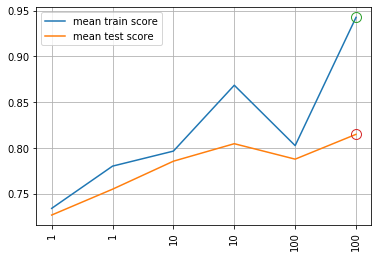

In [66]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

In [67]:
#calculating the accuracy
ksvmp_accuracies = cross_val_score(estimator = svr_p, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(ksvmp_accuracies.mean()*100))

Accuracy: 77.86 %


### SVR Kernal with 'rbf'
has  a c and a penalising factor

In [68]:
#grid params are created
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [69]:
# rbf kernel is created
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [70]:
#svm kernel is fit on train
grid_svr_rbf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [71]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.8365


Best parameter c=100, gamma:0.1 is used

In [72]:
#svm is run with the best params
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.8437185943204758

In [73]:
#k fold validation is done
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.81434111 0.8484286  0.82455796 0.85511342 0.86504082 0.8498043 ]
0.84288103462407


In [74]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.071152,4.031929e-03,0.028725,1.285336e-02,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.205970,0.194301,0.182884,0.194385,0.009425,9,0.218345,0.198564,0.177066,0.197991,1.685706e-02
1,0.082817,1.450693e-02,0.020829,7.364291e-03,0.1,1,"{'C': 0.1, 'gamma': 1}",0.107500,0.093024,0.075152,0.091892,0.013230,10,0.118506,0.107117,0.089050,0.104891,1.212788e-02
2,0.109054,1.371924e-02,0.020828,7.365302e-03,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.052917,-0.064603,-0.084735,-0.067418,0.013141,14,-0.039915,-0.050002,-0.063458,-0.051125,9.644315e-03
3,0.098934,4.100098e-02,0.036449,1.948387e-02,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.065537,-0.076694,-0.096042,-0.079424,0.012602,16,-0.051703,-0.060815,-0.075964,-0.062827,1.000620e-02
4,0.104146,7.366035e-03,0.057274,2.654645e-02,1,0.1,"{'C': 1, 'gamma': 0.1}",0.676014,0.687840,0.699335,0.687729,0.009521,5,0.704595,0.699479,0.685472,0.696515,8.083482e-03
5,0.096692,3.116402e-02,0.042930,1.652730e-02,1,1,"{'C': 1, 'gamma': 1}",0.630480,0.628598,0.624711,0.627930,0.002402,6,0.681413,0.680426,0.665199,0.675679,7.421829e-03
6,0.083279,7.380983e-03,0.026036,7.362886e-03,1,10,"{'C': 1, 'gamma': 10}",0.045873,0.048247,0.018858,0.037660,0.013330,11,0.183775,0.178112,0.177399,0.179762,2.852534e-03
7,0.081791,8.644008e-03,0.031243,1.403771e-06,1,100,"{'C': 1, 'gamma': 100}",-0.062100,-0.071709,-0.092622,-0.075477,0.012742,15,0.091486,0.082132,0.066568,0.080062,1.027744e-02
8,0.097109,1.311219e-02,0.046864,6.257699e-07,10,0.1,"{'C': 10, 'gamma': 0.1}",0.804398,0.799159,0.816324,0.806627,0.007183,2,0.830389,0.829842,0.818442,0.826224,5.507144e-03
9,0.129153,2.800608e-02,0.031243,9.798072e-07,10,1,"{'C': 10, 'gamma': 1}",0.797272,0.779430,0.795597,0.790766,0.008045,3,0.925280,0.926094,0.921315,0.924230,2.087658e-03


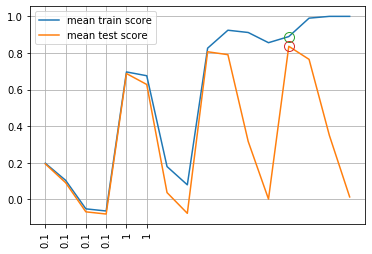

In [75]:
#Plot the train and test score
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

In [76]:
#calculating the accuracy
rbf_accuracies = cross_val_score(estimator = svr_rbf, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(rbf_accuracies.mean()*100))

Accuracy: 82.43 %


### Decision Tree
Decision tree model builds a parent - child node based tree to map the values a varible can take to land up at a conclusion 
We check with varying depths to take the best depth which would give a good accuracy.

In [77]:
# decision tree with parameters
from sklearn.tree import DecisionTreeRegressor

dtree_clf = DecisionTreeRegressor(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [78]:
#decision tree 
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [79]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 10}
Best cross-validation score: 0.88


In [80]:
# decision tree with parameters
dtree = DecisionTreeRegressor(max_depth=10)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.900


In [81]:
#calculating the accuracy
dtree_accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(dtree_accuracies.mean()*100))

Accuracy: 83.06 %


## All Models at a Glance

In [82]:
models_reg=[]
models_reg.append({'Model Name' : 'KNN Regression','Train score': round(knn_model.score(X_train,y_train),2),
               'Test score': round(knn_model.score(X_test,y_test),2),'Accuracy Score' : (knn_accuracies.mean()*100) })

models_reg.append({'Model Name' : 'Linear Regression','Train score': round(l_model.score(X_train, y_train),2),
               'Test score': round(l_model.score(X_test, y_test),2),'Accuracy Score' : (lg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Ridge Regression','Train score': round(ridge_model.score(X_train,y_train),2),
                         'Test score': round(ridge_model.score(X_test,y_test),2), 'Accuracy Score' : (rg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Lasso Regression','Train score': round(lasso_model.score(X_train,y_train),2),
                         'Test score': round(lasso_model.score(X_test,y_test),2), 'Accuracy Score' : (lasg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Polynomial Regression','Train score': (round(train.mean(),2)),
                         'Test score': (round(test.mean(),2)), 'Accuracy Score' : (pg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Linear SVM','Train score': round(lsvr.score(X_train,y_train),2),
                         'Test score': round(lsvr.score(X_test,y_test),2),'Accuracy Score' : (linsvm_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM RBF','Train score': round(grid_svr_rbf.score(X_train,y_train),2),
                         'Test score': round(grid_svr_rbf.score(X_test,y_test),2),'Accuracy Score' : (rbf_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM Poly','Train score': round(svr_p.score(X_train,y_train),2),
                         'Test score': round(svr_p.score(X_test,y_test),2),'Accuracy Score' : (ksvmp_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM Linear','Train score': round(grid_svr_linear.score(X_train,y_train),2),
                         'Test score': round(grid_svr_linear.score(X_test,y_test),2),'Accuracy Score' : (ksvml_accuracies.mean()*100)})

In [83]:
model_reg = pd.DataFrame(models_reg)
model_reg.set_index('Model Name', inplace = True)
model_reg

,Train score,Test score,Accuracy Score
Model Name,,,
KNN Regression,0.84,0.74,71.711058
Linear Regression,0.81,0.80,79.632961
Ridge Regression,0.81,0.81,79.517436
Lasso Regression,0.80,0.81,78.884871
Polynomial Regression,0.98,0.81,79.632961
Linear SVM,0.81,0.81,79.129671
Kernel SVM RBF,0.89,0.84,82.430094
Kernel SVM Poly,0.94,0.81,77.859857
Kernel SVM Linear,0.81,0.81,78.559665


Thus choosing Kernel SV RBF as the best model , we select the best parameters we had found before as c=100 and gamma =0.1
We run the prediction using this.

Gamma =0.1 provides a good classification boundary for the region but a higher value of gamma would end up forming islands
while a much lower value will not give a good boundary for the regions

C=100 the kernel is little intolerant created towards misclassifcation with a good boundary while a higher value will create closer boundaries

In [84]:
#svm is run with the best params
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.8437185943204758

In [85]:
#k fold validation is done
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.81434111 0.8484286  0.82455796 0.85511342 0.86504082 0.8498043 ]
0.84288103462407


In [86]:
#calculating the accuracy
rbf_accuracies = cross_val_score(estimator = svr_rbf, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(rbf_accuracies.mean()*100))

Accuracy: 82.43 %


Therefore our best model which is <b>SV RBF model</b> predicts the <b>Life expectancy</b> of each country with an accuracy of <b>82.43%</b>